# **PRAKTIKUM 1**

## **LANGKAH 1 - Import Library**

In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## **LANGKAH 2 - Load dan Inspeksi Data**

In [15]:
df = pd.read_csv('dataset/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## **LANGKAH 3 - Seleksi Fitur**

memisahkan fitur dan label dengan menggunakan proses *slicing* data

In [17]:
# Features Selection
X = df.iloc[:, 1:-1] # slice the features
y = df.iloc[:, -1] # this is the labels (we don't need it)

In [18]:
print(X.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2


## **LANGKAH 4 - Plotting**

melakukan proses plot menggunakan scatter plot untuk melihat sebaran data berdasarkan 2 fitur, yaitu SepalLengthCm dan SepalWidthCm.

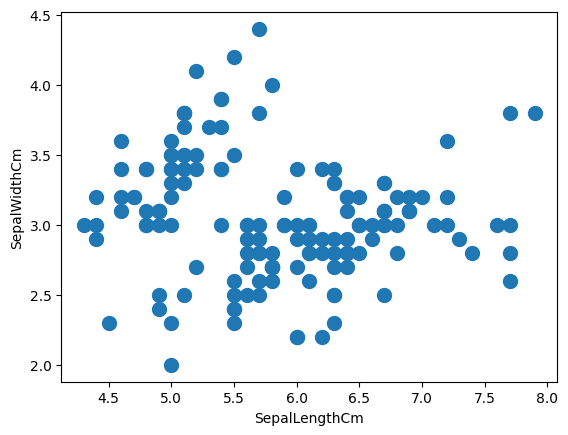

In [19]:
# Make a scatterplot using SepalLengthCm and SepalWidthCm
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

## **LANGKAH 5 - Membuat Model K-Means**

Membuat model K-Means dengan asumsi terdapat dua cluster sesuai dengan amatan visual pada scatterplot.

In [ ]:
# Build a K-Means Model
# Based on visual inspection using scatterplot, 
# we can assumpt that the data has 2 cluster 
# (even though, from the label, there are 3 labels in this data) 

from sklearn.cluster import KMeans

# Initiate K-Means object with numbur of cluster is 2
cl_kmeans = KMeans(n_clusters=2)

# Fit and predict
y_kmeans = cl_kmeans.fit_predict(X)

Setelah model mempelajari data yang kita miliki melalui fungsi fit_predict(), kita dapat melakukan pengecekan hasil klasterisasi dengan memanfaatkan scatterplot.

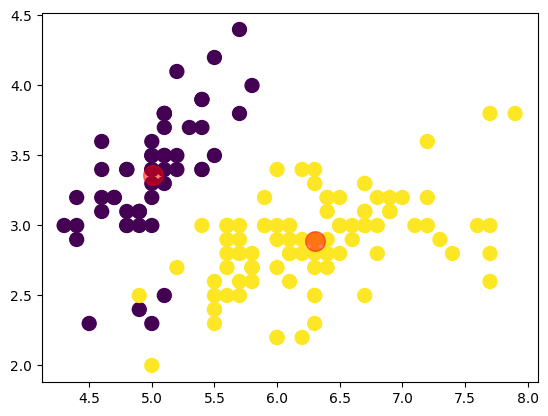

In [21]:
# Plot the clustering result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot the centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

## **LANGKAH 6 - Evaluasi Model**

Untuk mengetahui apakah model klasterisasi yang dihasilkan memiliki performa yang baik, maka kita akan melakukan proses evaluasi. Nilai metrik evaluasi yang dapat kita gunakan salah satunya adalah sum of square error (SSE). Untuk mendapatkan nilai SSE, kita cukup mengakses properti inertia_ dari objek K-Means yang telah dilatih sebelumnya.

In [22]:
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733906


## **LANGKAH 7 - Menentukan *k* terbaik dengan Elbow Method**

Untuk menentukan jumlah cluster yang akan digunakan, dapat menggunakan *elbow method* untuk mendapatkan jumlah cluster yang terbaik. Cara kerja *elbow method* sederhana saja, yaitu:

1. Tentukan rentang *k* yang ingin dievaluasi
2. Kalkulasi nilai SSE untuk setiap nilai *kk* pada rentang yang telah ditentukan
3. Buat grafik *lineplot* untuk mendapatkan visualisasi sebagai dasar justifikasi

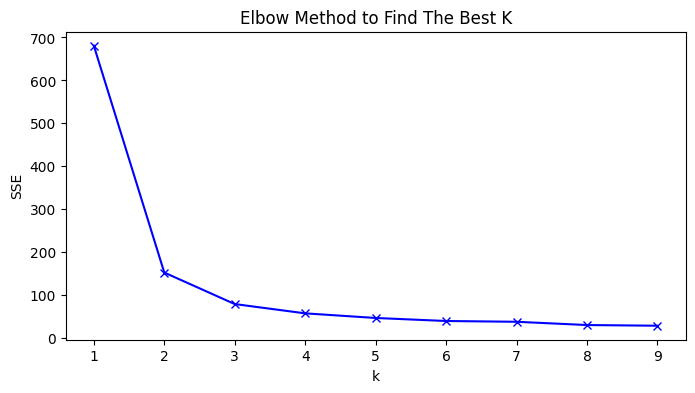

In [23]:
# Find the best k
# using Elbow Method

# List SSE values
sse = []

# Build k range from 1 to 9
K = range(1,10)

# Find the SSE value for each k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)

# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Elbow Method to Find The Best K")
plt.show()

dilihat dari lineplot SSE untuk setiap *k*, bisa dikatakan nilai *k* terbaik adalah 3. *k* = 3? Hal ini dikarenakan pada nilai *k* = 2 nilai SSE masih terlalu tinggi dibandingkan *k* = 4, sedangkan, misal *k* = 8 sangat rendah. **Jumlah cluster terbaik bukan karena nilai SSE yang rendah.**

SSE pasti aka semakin mengecil seiring dengan jumlah cluster yang dihasilkan. Hal ini dikarenakan jumlah anggota tiap cluster juga semakin mengecil dan cluster otomatis lebih sempit. 

**Dalam konteks ini, kita harus dapat menemukan posisi dimana nilai *k* telah turun dengan tajam diikuti dengan penurunan yang lebih stabil.** Posisi inilah yang dikenal dengan posisi "elbow". Dalam konteks fitur yang kita gunakan saat ini, nilai *k* = 3 menjadi nilai yang paling optimal.